In [ ]:
# Forming 1KG

import os

# List all chromosome files
chromosomes = [f"./LDREF/1000G.EUR.{n}" for n in range(1, 23)]
current_merge = chromosomes[0]

os.makedirs('indiv_risk_intermediate', exist_ok=True)

for chrom in chromosomes[1:]:
    output = "./indiv_risk_intermediate/1KG" 
    cmd = f"plink --bfile {current_merge} --bmerge {chrom}.bed {chrom}.bim {chrom}.fam --make-bed --out {output}"
    print(f"Running: {cmd}")
    current_merge = output
    os.system(cmd)


Running: plink --bfile ./LDREF/1000G.EUR.1 --bmerge ./LDREF/1000G.EUR.2.bed ./LDREF/1000G.EUR.2.bim ./LDREF/1000G.EUR.2.fam --make-bed --out 1KG
Running: plink --bfile 1KG --bmerge ./LDREF/1000G.EUR.3.bed ./LDREF/1000G.EUR.3.bim ./LDREF/1000G.EUR.3.fam --make-bed --out 1KG
Running: plink --bfile 1KG --bmerge ./LDREF/1000G.EUR.4.bed ./LDREF/1000G.EUR.4.bim ./LDREF/1000G.EUR.4.fam --make-bed --out 1KG
Running: plink --bfile 1KG --bmerge ./LDREF/1000G.EUR.5.bed ./LDREF/1000G.EUR.5.bim ./LDREF/1000G.EUR.5.fam --make-bed --out 1KG
Running: plink --bfile 1KG --bmerge ./LDREF/1000G.EUR.6.bed ./LDREF/1000G.EUR.6.bim ./LDREF/1000G.EUR.6.fam --make-bed --out 1KG
Running: plink --bfile 1KG --bmerge ./LDREF/1000G.EUR.7.bed ./LDREF/1000G.EUR.7.bim ./LDREF/1000G.EUR.7.fam --make-bed --out 1KG
Running: plink --bfile 1KG --bmerge ./LDREF/1000G.EUR.8.bed ./LDREF/1000G.EUR.8.bim ./LDREF/1000G.EUR.8.fam --make-bed --out 1KG
Running: plink --bfile 1KG --bmerge ./LDREF/1000G.EUR.9.bed ./LDREF/1000G.EUR.9.b

In [21]:
import subprocess

In [ ]:
# Clumping GWAS

plink_command = (
    f"plink --bfile ./indiv_risk_intermediate/1KG \
      --clump Height.gwas.txt.gz \
      --clump-p1 1e-3 \
      --clump-r2 0.1 \
      --clump-kb 250 \
      --out ./indiv_risk_intermediate/pruned_gwas"
)
# plink --vcf input.vcf --biallelic-only strict --make-bed --out output

try:
    result = subprocess.run(plink_command, shell=True, check=True, capture_output=True, text=True)
    print("PLINK output:", result.stdout)  
except subprocess.CalledProcessError as e:
    print("Error occurred:", e.stderr)  



PLINK output: PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to pruned_gwas.log.
Options in effect:
  --bfile 1KG
  --clump Height.gwas.txt.gz
  --clump-kb 250
  --clump-p1 1e-3
  --clump-r2 0.1
  --out pruned_gwas

16075 MB RAM detected; reserving 8037 MB for main workspace.
281413 variants loaded from .bim file.
489 people (0 males, 0 females, 489 ambiguous) loaded from .fam.
Ambiguous sex IDs written to pruned_gwas.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 489 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is exactly 1.
281413 variants and 489 people pass filters and QC.
Note: No phenotype

In [ ]:

# Initial Merge

plink_command = (
    f"plink --bfile ./indiv_risk_intermediate/1KG --bmerge Tiffany.bed Tiffany.bim Tiffany.fam --make-bed --out ./indiv_risk_intermediate/merged"  
)

try:
    result = subprocess.run(plink_command, shell=True, check=True, capture_output=True, text=True)
    print("PLINK output:", result.stdout)  
except subprocess.CalledProcessError as e:
    print("Error occurred:", e.stderr)  


Error occurred: Error: 7000 variants with 3+ alleles present.
* If you believe this is due to strand inconsistency, try --flip with
  merged-merge.missnp.
  (Warning: if the subsequent merge seems to work, strand errors involving SNPs
  with A/T or C/G alleles probably remain in your data.  If LD between nearby
  SNPs is high, --flip-scan should detect them.)
* If you are dealing with genuine multiallelic variants, we recommend exporting
  that subset of the data to VCF (via e.g. '--recode vcf'), merging with
  another tool/script, and then importing the result; PLINK is not yet suited
  to handling them.
See https://www.cog-genomics.org/plink/1.9/data#merge3 for more discussion.



In [ ]:
# Cleaning

plink_command = ("plink --bfile Tiffany --exclude ./indiv_risk_intermediate/merged-merge.missnp --make-bed --out ./indiv_risk_intermediate/Tiffany_cleaned")

try:
    result = subprocess.run(plink_command, shell=True, check=True, capture_output=True, text=True)
    print("PLINK output:", result.stdout)  
except subprocess.CalledProcessError as e:
    print("Error occurred:", e.stderr) 
    
plink_command = ("plink --bfile ./indiv_risk_intermediate/1KG --exclude ./indiv_risk_intermediate/merged-merge.missnp --make-bed --out ./indiv_risk_intermediate/1KG_cleaned")

try:
    result = subprocess.run(plink_command, shell=True, check=True, capture_output=True, text=True)
    print("PLINK output:", result.stdout)  
except subprocess.CalledProcessError as e:
    print("Error occurred:", e.stderr) 
    


PLINK output: PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Tiffany_cleaned.log.
Options in effect:
  --bfile Tiffany
  --exclude merged-merge.missnp
  --make-bed
  --out Tiffany_cleaned

16075 MB RAM detected; reserving 8037 MB for main workspace.
51915 variants loaded from .bim file.
1 person (0 males, 0 females, 1 ambiguous) loaded from .fam.
Ambiguous sex ID written to Tiffany_cleaned.nosex .
--exclude: 44915 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1 founder and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.945319.
44915 variants and 1 person pass filters and QC.
Note: No pheno

In [ ]:
# Final Merge

plink_command = (
    f"plink --bfile ./indiv_risk_intermediate/1KG_cleaned --bmerge ./indiv_risk_intermediate/Tiffany_cleaned.bed ./indiv_risk_intermediate/Tiffany_cleaned.bim ./indiv_risk_intermediate/Tiffany_cleaned.fam --make-bed --out ./indiv_risk_intermediate/merged_clean"  
)

try:
    result = subprocess.run(plink_command, shell=True, check=True, capture_output=True, text=True)
    print("PLINK output:", result.stdout)  
except subprocess.CalledProcessError as e:
    print("Error occurred:", e.stderr)  

PLINK output: PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to merged_clean.log.
Options in effect:
  --bfile 1KG_cleaned
  --bmerge Tiffany_cleaned.bed Tiffany_cleaned.bim Tiffany_cleaned.fam
  --make-bed
  --out merged_clean

16075 MB RAM detected; reserving 8037 MB for main workspace.
489 people loaded from 1KG_cleaned.fam.
1 person to be merged from Tiffany_cleaned.fam.
Of these, 1 is new, while 0 are present in the base dataset.
274413 markers loaded from 1KG_cleaned.bim.
44915 markers to be merged from Tiffany_cleaned.bim.
Of these, 38061 are new, while 6854 are present in the base dataset.
Performing single-pass merge (490 people, 312474 variants).

Pass 1: fileset #1 complete.
                                              
Merged fileset written to merged_clean-merge.bed + merged_clean-merge.bim +
merged_clean-merge.fam .
312474 variants loaded from .bim file.

In [50]:
import pandas as pd
import numpy as np
height_gwas = pd.read_csv('Height.gwas.txt.gz', sep='\t', compression='gzip')
height_gwas

,CHR,BP,SNP,A1,A2,N,SE,P,OR,INFO,MAF
0,1,756604,rs3131962,A,G,388028,0.003017,0.483171,0.997887,0.890558,0.369390
1,1,768448,rs12562034,A,G,388028,0.003295,0.834808,1.000687,0.895894,0.336846
2,1,779322,rs4040617,G,A,388028,0.003033,0.428970,0.997604,0.897508,0.377368
3,1,801536,rs79373928,G,T,388028,0.008413,0.808999,1.002036,0.908963,0.483212
4,1,808631,rs11240779,G,A,388028,0.002428,0.590265,1.001308,0.893213,0.450410
...,...,...,...,...,...,...,...,...,...,...,...
529499,22,51174939,rs73174435,T,C,388028,0.004538,0.007335,1.012243,0.887884,0.487075
529500,22,51175626,rs3810648,G,A,388028,0.004251,0.000078,1.016933,0.890887,0.290302
529501,22,51183255,rs5771002,A,G,388028,0.002156,0.000799,1.007256,0.890567,0.237780
529502,22,51185848,rs3865764,G,A,388028,0.004631,0.554611,0.997267,0.905337,0.403402


In [ ]:
pruned_gwas = pd.read_csv('./indiv_risk_intermediate/pruned_gwas.clumped', sep='\s+')
lead_snps = pruned_gwas['SNP'].values
lead_snps

array(['rs3170863', 'rs9843148', 'rs795443', ..., 'rs10202797',
       'rs7584977', 'rs13006240'], dtype=object)

In [54]:
height_gwas_lead_snps = height_gwas[height_gwas['SNP'].isin(lead_snps)]
height_gwas_lead_snps['BETA'] = height_gwas_lead_snps['OR'].apply(np.log)
height_gwas_lead_snps

C:\Users\linyo\AppData\Local\Temp\ipykernel_27168\3267887450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_gwas_lead_snps['BETA'] = height_gwas_lead_snps['OR'].apply(np.log)


,CHR,BP,SNP,A1,A2,N,SE,P,OR,INFO,MAF,BETA
18,1,873558,rs1110052,G,T,388028,0.002256,2.856740e-04,0.991849,0.900476,0.368089,-0.008184
128,1,1249187,rs12142199,G,A,388028,0.002505,2.054120e-08,1.014147,0.907492,0.407618,0.014048
323,1,2314319,rs2643901,T,C,388028,0.003239,2.228160e-04,0.988114,0.899496,0.459900,-0.011958
495,1,3089849,rs17390062,C,T,388028,0.003649,1.854190e-04,0.986452,0.888872,0.445198,-0.013640
539,1,3184855,rs2455119,T,G,388028,0.002624,8.080920e-04,1.008829,0.893422,0.330442,0.008790
...,...,...,...,...,...,...,...,...,...,...,...,...
120566,3,196535799,rs9863627,G,T,388028,0.002950,5.385780e-04,0.989841,0.887147,0.459860,-0.010211
120598,3,196674749,rs4916589,C,T,388028,0.002062,4.148720e-04,1.007305,0.891143,0.251415,0.007279
120626,3,196746629,rs1056664,C,T,388028,0.002437,7.281140e-06,0.989127,0.898682,0.280219,-0.010932
120677,3,197060036,rs4916471,G,A,388028,0.002131,9.187630e-07,1.010515,0.899328,0.476431,0.010460


In [55]:
height_gwas_lead_snps[['SNP', 'A1', "BETA"]].to_csv('./prs_weights.txt', sep='\t', index=False)

In [ ]:
# Generate PRS

plink_command = (
    f"plink --bfile ./indiv_risk_intermediate/merged_clean --score prs_weights.txt 1 2 3 sum --out ./results/indiv_risk_assessment/prs_scores"  
)

try:
    result = subprocess.run(plink_command, shell=True, check=True, capture_output=True, text=True)
    print("PLINK output:", result.stdout)  
except subprocess.CalledProcessError as e:
    print("Error occurred:", e.stderr)  

PLINK output: PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to prs_scores.log.
Options in effect:
  --bfile merged_clean
  --out prs_scores
  --score prs_weights.txt 1 2 3 sum

16075 MB RAM detected; reserving 8037 MB for main workspace.
312474 variants loaded from .bim file.
490 people (0 males, 0 females, 490 ambiguous) loaded from .fam.
Ambiguous sex IDs written to prs_scores.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 490 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.87668.
312474 variants and 490 people pass filters and QC.
Note: No phenotypes present.
--score: 1925 valid predictors

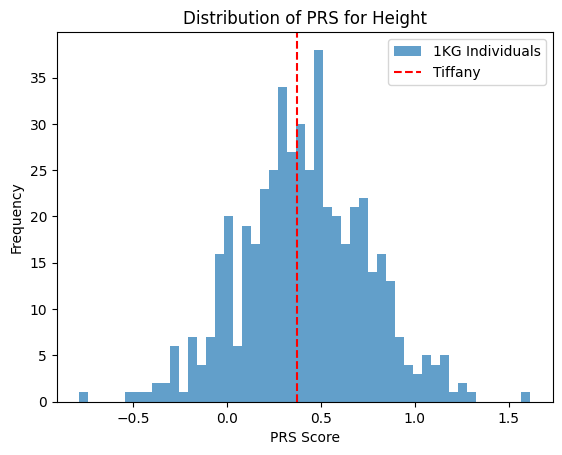

Tiffany's relative risk: -0.12


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PRS results
prs = pd.read_csv('./results/indiv_risk_assessment/prs_scores.profile', sep='\s+')

# Plot PRS distribution for 1KG individuals
plt.hist(prs['SCORESUM'], bins=50, alpha=0.7, label='1KG Individuals')
tiffany_score = prs[prs['FID'] == 'Tiffany']['SCORESUM'].values[0]
plt.axvline(tiffany_score, color='red', linestyle='--', label='Tiffany')
plt.xlabel('PRS Score')
plt.ylabel('Frequency')
plt.title('Distribution of PRS for Height')
plt.legend()
plt.show()

# Calculate Tiffany's relative risk
mean_prs = prs['SCORESUM'].mean()
std_prs = prs['SCORESUM'].std()
relative_risk = (tiffany_score - mean_prs) / std_prs
print(f"Tiffany's relative risk: {relative_risk:.2f}")


In [60]:
mean_prs, std_prs

(0.4122119533061224, 0.3378803812589918)